In [1]:
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import DATA_INFO as data_info
import os


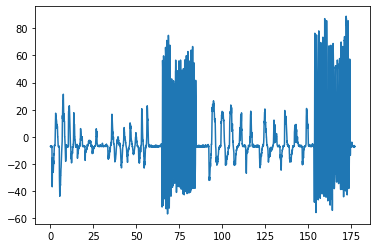

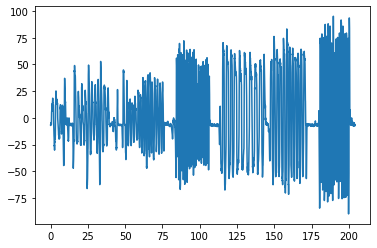

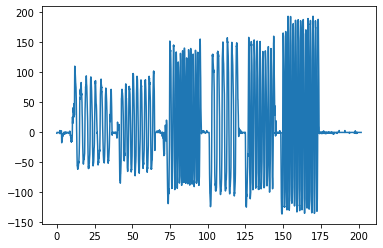

In [2]:
# plot spirometry data
import matplotlib.pyplot as plt
for i in range(data_info.Raw.count()):
    path = os.path.join(data_info.Raw.path, str(i+1), data_info.Raw.FileNames.spiro_data_file)
    spiro = d_utils.Spiro.read(path)
    plt.plot(spiro.time_span,spiro.flow)
    plt.show()

<h3>Trim</h3>

In [3]:
# Split Video and Spirometry data from timer files
for i in range(data_info.Raw.count()):
    path = data_info.Raw.path + str(i+1) + '/'
    print('path : ', path)
    
    print('\t spiro : ')
    d_utils.Trim(path)

    print('\t video : ')
    video = v_utils.VideoReader_cv2(path + '/vid.mp4')
    video.TrimFromFile(path)

path :  Data/0_Raw/1/
	 spiro : 
		 Data\1_Trimmed\00data.txt
		 Data\1_Trimmed\01data.txt
		 Data\1_Trimmed\02data.txt
		 Data\1_Trimmed\03data.txt
		 Data\1_Trimmed\04data.txt
		 Data\1_Trimmed\05data.txt
	 video : 
		 2 Data\1_Trimmed\00vid.mp4
		 32 Data\1_Trimmed\01vid.mp4
		 63 Data\1_Trimmed\02vid.mp4
		 90 Data\1_Trimmed\03vid.mp4
		 121 Data\1_Trimmed\04vid.mp4
		 152 Data\1_Trimmed\05vid.mp4
path :  Data/0_Raw/2/
	 spiro : 
		 Data\1_Trimmed\06data.txt
		 Data\1_Trimmed\07data.txt
		 Data\1_Trimmed\08data.txt
		 Data\1_Trimmed\09data.txt
		 Data\1_Trimmed\10data.txt
		 Data\1_Trimmed\11data.txt
	 video : 
		 13 Data\1_Trimmed\06vid.mp4
		 46 Data\1_Trimmed\07vid.mp4
		 82 Data\1_Trimmed\08vid.mp4
		 110 Data\1_Trimmed\09vid.mp4
		 143 Data\1_Trimmed\10vid.mp4
		 176 Data\1_Trimmed\11vid.mp4
path :  Data/0_Raw/3/
	 spiro : 
		 Data\1_Trimmed\12data.txt
		 Data\1_Trimmed\13data.txt
		 Data\1_Trimmed\14data.txt
		 Data\1_Trimmed\15data.txt
		 Data\1_Trimmed\16data.txt
		 Data\1_

In [4]:
# Add ROI x and y to Spiro file
for i in range(data_info.Trimmed.count()):
    v_utils.getVidCircleAvg(
        path=data_info.Trimmed.path,
        name=data_info.Trimmed.FileNames.video_name.format(i),
        save_path=data_info.Trimmed.path,
        save_name=data_info.Trimmed.FileNames.data_name.format(i))




00vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 00vid.mp4
	frame number 0 ignored!


01vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 01vid.mp4


02vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 02vid.mp4


03vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 03vid.mp4


04vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 04vid.mp4


05vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 05vid.mp4


06vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 06vid.mp4


07vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 07vid.mp4


08vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 08vid.mp4


09vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 09vid.mp4


10vid
PRESS → Jump Frame // Esc to Jump video // r to Reset Processing 10vid.mp4


11vid
PRESS → Jump Frame // Esc to Jump video // r to Reset 

<h3>First Sync</h3>
<p>Sync Videos and Spirometry Files from 'shilft.txt' file </br>
Normalize all Spirometry Data Between Zero and One</p>

160.37 -124.56
2.97 -2.49


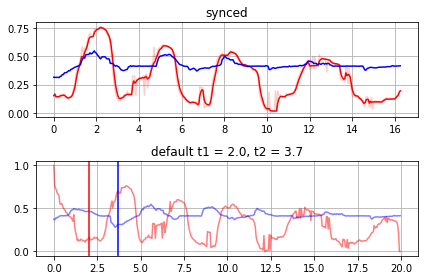

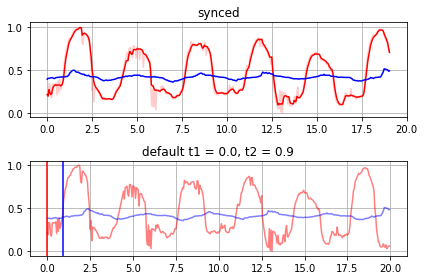

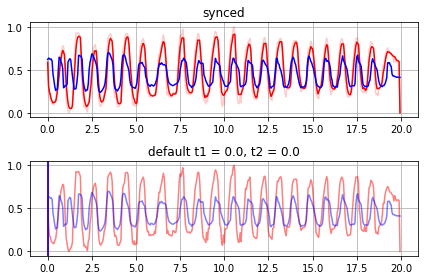

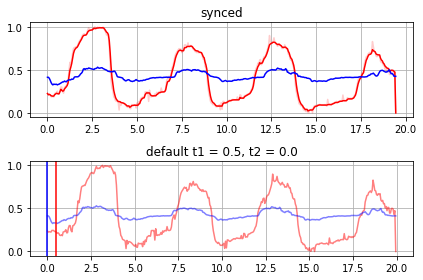

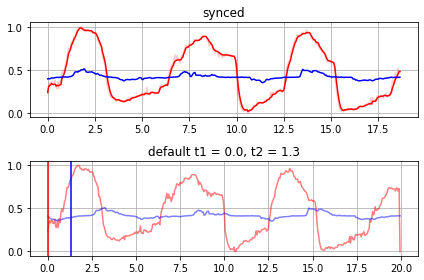

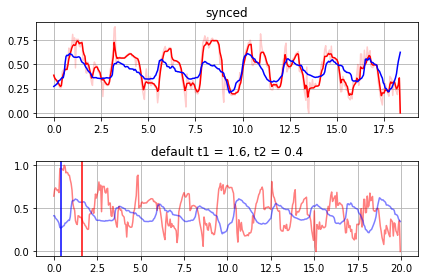

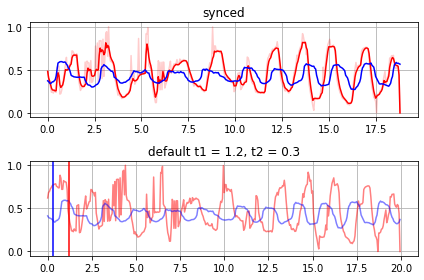

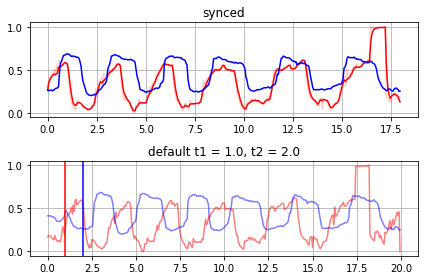

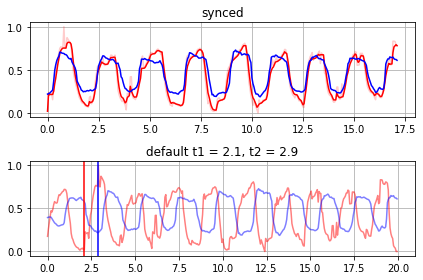

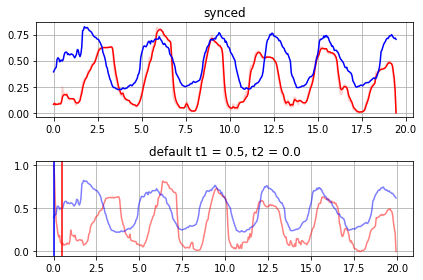

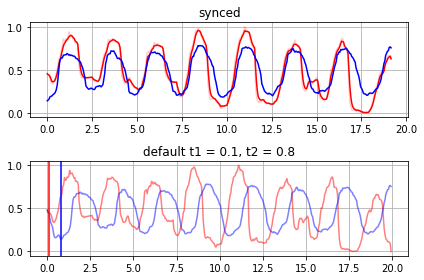

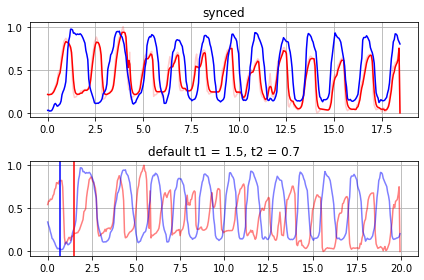

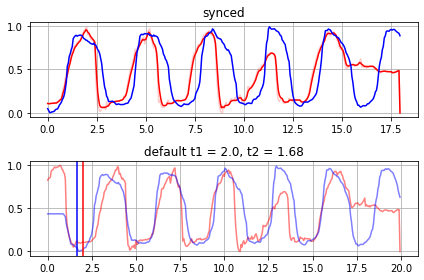

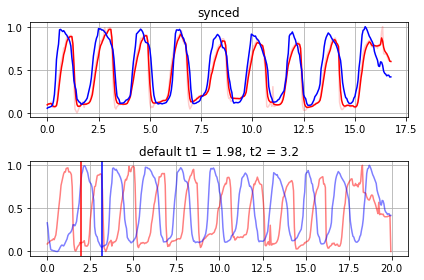

In [1]:
import numpy as np, os
import DATA_INFO as data_info
import Functions.DataUtils as d_utils

exclide_list = [5, 8, 11, 17]
include_list = []

if include_list != []:
    exclide_list = [i for i in range(18) if i not in include_list]
f_max, f_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt', exclide_list)
v_max, v_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'volume', '{:02d}data.txt', exclide_list)
print(f_max, f_min)
print(v_max, v_min)


path = data_info.Trimmed.path
if not os.path.isfile(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file):
    indexes = list(range(data_info.Trimmed.count()))
    flow_col = [0] * data_info.Trimmed.count()
    vid_col = [0] * data_info.Trimmed.count()
    d_utils.File.save(zip(indexes, flow_col, vid_col), data_info.Trimmed.path +
                      data_info.Trimmed.FileNames.shifts_file, ['index', 'vid_delay', 'flow_delay'], False)

trimme_index = 0
sync_index = 0
while trimme_index < data_info.Trimmed.count():
    if trimme_index not in exclide_list:
        d_utils.sync_data_first(sync_index=sync_index, trim_index=trimme_index,
                          plot_or_not=True, normalize_to=[f_max, f_min, v_max, v_min])
        sync_index = sync_index + 1
        # key = input('command : ')
        # if key == 'e':
        #     break
        # elif key == 'r':
        #     trimme_index = trimme_index - 1
    
    trimme_index = trimme_index + 1

<h3>Second Sync</h3>

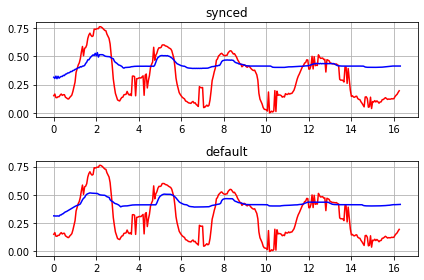

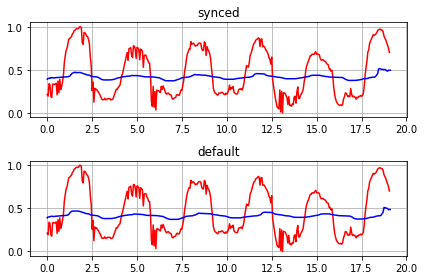

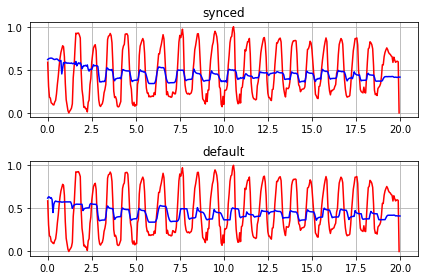

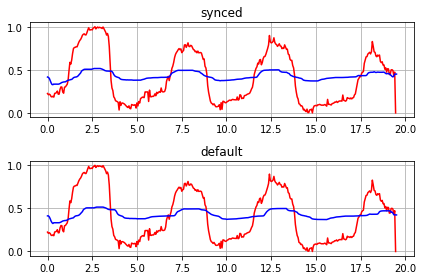

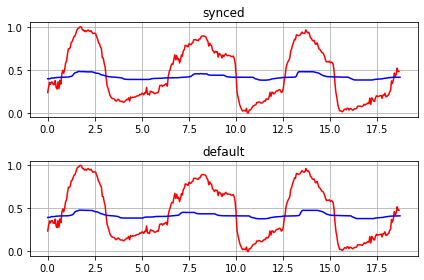

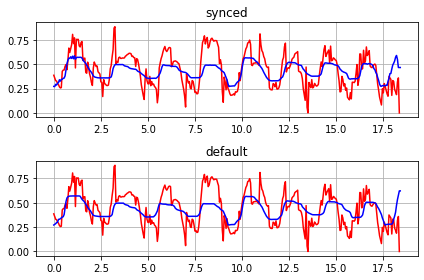

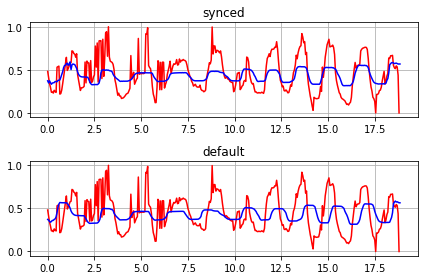

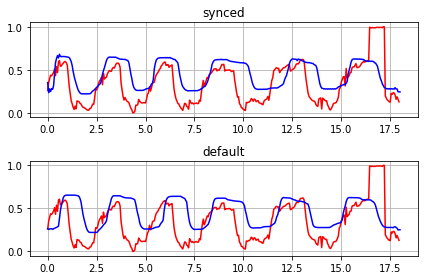

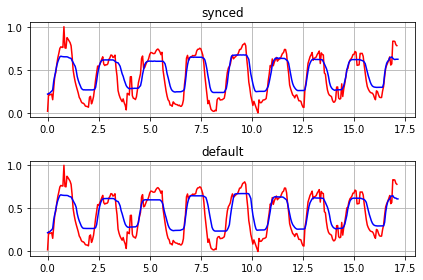

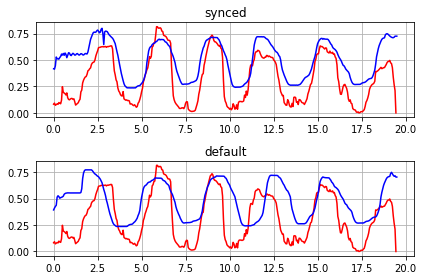

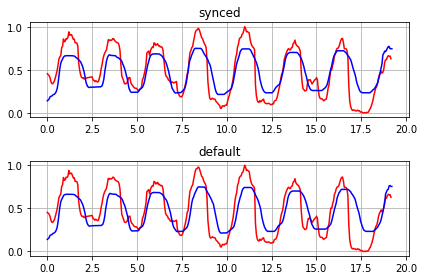

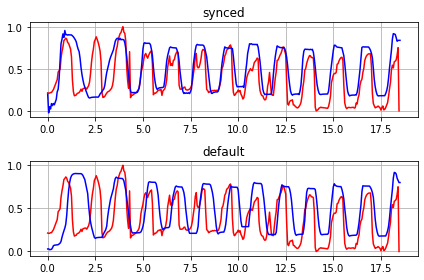

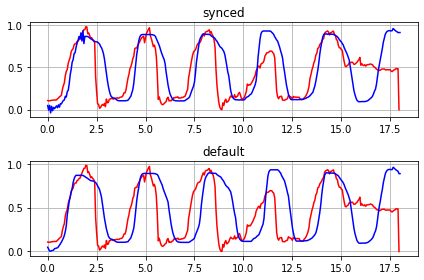

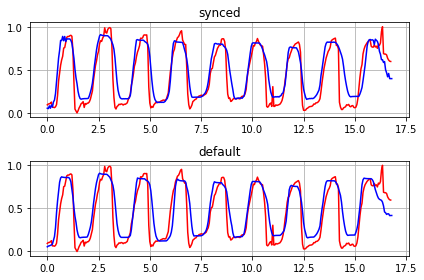

In [2]:
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info
import matplotlib.pyplot as plt
import numpy as np
import os, shutil

plot_or_not = True
fps = 20
for i in range(data_info.Synced.count()):
    data = d_utils.File.read(data_info.Synced.path_first_sync +
                             data_info.Synced.FileNames.data_name.format(i) + '.txt')
    synced = list(g_utils.peak_sync(data['flow'], data['average']))
    synced.append(synced[-1])
    save_data = g_utils.pack(
        synced, data['volume'], data['position_x'], data['position_y'], data['radius'], data['average'])

    d_utils.File.save(save_data, data_info.Synced.path + data_info.Synced.FileNames.data_name.format(
        i) + ".txt", ['flow', 'volume', 'position_x', 'position_y', 'radius', 'average'])
    
    shutil.copy(data_info.Synced.path_first_sync + data_info.Synced.FileNames.video_name.format(i) + '.mp4', 
                data_info.Synced.path + data_info.Synced.FileNames.video_name.format(i) + '.mp4')
    
    
    if plot_or_not:
        time_span = np.arange(0, len(synced)/fps, 1/fps)
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.title('synced')
        plt.plot(time_span, data['average'], 'r')
        plt.plot(time_span, synced, 'b')

        plt.grid()

        plt.subplot(2, 1, 2)
        plt.title('default')
        plt.plot(time_span, data['average'], 'r')
        plt.plot(time_span, data['flow']+[data['flow'][-1]], 'b')
        plt.grid()

        plt.tight_layout()
        plt.show()
    
